In [6]:
import numpy as np
import pyqtgraph as pg
from PyQt6 import QtGui, QtCore
from PyQt6.QtWidgets import QDockWidget, QWidget, QMainWindow
from PyQt6.QtCore import QPointF
import PyQt6

In [51]:
image=np.eye(3)
print(image)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [52]:
win = pg.GraphicsLayoutWidget()
plot1 = pg.PlotItem()
img = pg.ImageItem( image, levels=(0,1) )
tr = QtGui.QTransform()  # prepare ImageItem transformation:
tr.scale(6.0, 3.0)       # scale horizontal and vertical axes
tr.translate(-1.5, -1.5) # move 3x3 image to locate center at axis origin
img.setTransform(tr)
plot1.addItem( img )  # add ImageItem to PlotItem
plot1.showAxes(True)  # frame it with a full set of axes
plot1.invertY(True)   # vertical axis counts top to bottom
print(plot1)

In [58]:
main = QMainWindow()
win = pg.GraphicsView()
win.setCentralItem(img)
#win.show()
#widget = pg.PlotWidget()
#widget.addItem(img)
#main = QDockWidget("Testing Window")
#popwidget = QWidget()
#popwidget.setLayou
main.setCentralWidget(win)
main.show()

RuntimeError: wrapped C/C++ object of type ImageItem has been deleted

In [9]:
point = {'pos': ([0.05638842, 0.01019244])}
print(point['pos'][0])
q = QPointF()
q.setX(point['pos'][0])
q.setY(point['pos'][1])
print(q)
print(q.x())
print(q.y())

0.05638842
PyQt6.QtCore.QPointF(0.05638842, 0.01019244)
0.05638842
0.01019244


In [ ]:
data = []
data.append({})

for i in range(2):
    for n, key in enumerate(sorted(data[i].keys)):
        for m, item in enumerate(data[i][key]):
            print()

In [18]:
import pyqtgraph as pg
from pyqtgraph.graphicsItems import ROI

pg.mkQApp()

plot = pg.PlotWidget()
# moving_item = pg.TextItem("Moving", anchor=(0.5, 0.5))
moving_item = pg.TextItem("Moving")
still_item = pg.TextItem("Still", anchor=(0.5, 0.5))

still_item.setFlag(still_item.GraphicsItemFlag.ItemIgnoresTransformations)
# ^^^ This line is necessary

roi_item = ROI.RectROI(pos=[0,0], size=0.5, pen=(255,255,255))
# roi_item.setZValue(20)

plot.addItem(roi_item)
roi_item.show()

moving_item.setParentItem(roi_item)
# plot.addItem(moving_item, ignoreBounds=True)
# Use this instead of `plot.addItem`
still_item.setParentItem(plot.plotItem)

# This position will be in pixels, not scene coordinates since transforms are ignored.
# You can use helpers like `mapFromScene()` etc. to translate between pixels
# and viewbox coordinates
still_item.setPos(300, 300)

plot.show()

pg.exec()

0

In [ ]:
"""
def contextMenuEvent(self, event):
    self.menu = QtGui.QMenu(self)
    renameAction = QtGui.QAction('Rename', self)
    renameAction.triggered.connect(lambda: self.renameSlot(event))
    self.menu.addAction(renameAction)
    # add other required actions
    self.menu.popup(QtGui.QCursor.pos())
    ...

def renameSlot(self, event):
    print "renaming slot called"
    # get the selected row and column
    row = self.tableWidget.rowAt(event.pos().y())
    col = self.tableWidget.columnAt(event.pos().x())
    # get the selected cell
    cell = self.tableWidget.item(row, col)
    # get the text inside selected cell (if any)
    cellText = cell.text()
    # get the widget inside selected cell (if any)
    widget = self.tableWidget.cellWidget(row, col)
"""

In [1]:
pip install qtwidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


https://www.pythonguis.com/widgets/equalizerbar/ \
https://www.pythonguis.com/tutorials/plotting-matplotlib/ \
https://stackoverflow.com/questions/22874583/display-a-2d-histogram-in-pyqtgraph-with-correct-axes \
https://stackoverflow.com/questions/27156381/python-creating-a-2d-histogram-from-a-numpy-matrix

Text(0, 0.5, 'Counts')

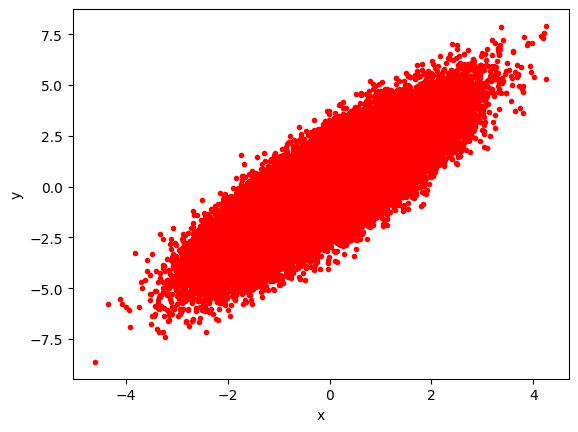

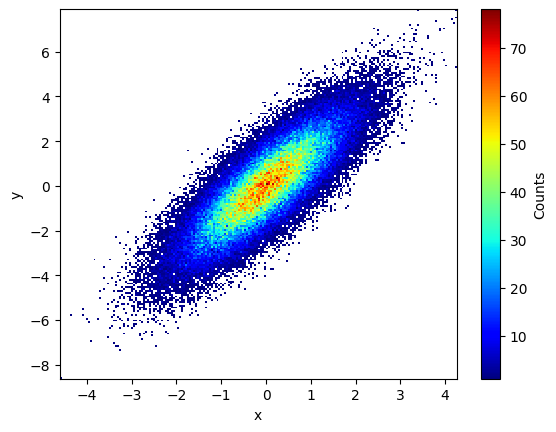

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

np.set_printoptions(threshold=sys.maxsize)

# Create some random numbers
n = 100000
x = np.random.randn(n)
y = (1.5 * x) + np.random.randn(n)
 
# Plot data
fig1 = plt.figure()
plt.plot(x,y,'.r')
plt.xlabel('x')
plt.ylabel('y')

# Estimate the 2D histogram
nbins = 200
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)
 
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
# print(f"H: {H}")
 
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
# print(f"Hmasked: {Hmasked}")
 
# Plot 2D histogram using pcolor
fig2 = plt.figure()
plt.pcolormesh(xedges,yedges,Hmasked,cmap='jet')
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

In [1]:
import sys
import random
import matplotlib
import PyQt6
matplotlib.use('QtAgg')

from PyQt6 import QtCore, QtWidgets

from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure

class MplCanvas(FigureCanvas):

    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        super(MplCanvas, self).__init__(fig)

class MainWindow(QtWidgets.QMainWindow):

    def __init__(self, *args, **kwargs):
        super(MainWindow, self).__init__(*args, **kwargs)

        self.canvas = MplCanvas(self, width=5, height=4, dpi=100)
        self.setCentralWidget(self.canvas)

        n_data = 50
        self.xdata = list(range(n_data))
        self.ydata = [random.randint(0, 10) for i in range(n_data)]

        # We need to store a reference to the plotted line
        # somewhere, so we can apply the new data to it.
        self._plot_ref = None
        self.update_plot()

        self.show()

        # Setup a timer to trigger the redraw by calling update_plot.
        self.timer = QtCore.QTimer()
        self.timer.setInterval(100)
        self.timer.timeout.connect(self.update_plot)
        self.timer.start()

    def update_plot(self):
        # Drop off the first y element, append a new one.
        self.ydata = self.ydata[1:] + [random.randint(0, 10)]

        # Note: we no longer need to clear the axis.
        if self._plot_ref is None:
            # First time we have no plot reference, so do a normal plot.
            # .plot returns a list of line <reference>s, as we're
            # only getting one we can take the first element.
            plot_refs = self.canvas.axes.plot(self.xdata, self.ydata, 'r')
            self._plot_ref = plot_refs[0]
        else:
            # We have a reference, we can use it to update the data for that line.
            self._plot_ref.set_ydata(self.ydata)

        # Trigger the canvas to update and redraw.
        self.canvas.draw()
        
app = QtWidgets.QApplication(sys.argv)
w = MainWindow()
app.exec()

0

In [2]:
# importing PyQt6
import PyQt6
from PyQt6 import QtGui, QtWidgets, QtCore
 
# importing system
import sys
 
# importing numpy as np
import numpy as np
 
# importing pyqtgraph as pg
import pyqtgraph as pg




# Create some random numbers
n = 100000
x = np.random.randn(n)
y = (1.5 * x) + np.random.randn(n)

# Estimate the 2D histogram
nbins = 200
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)

# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)


# plot = pg.PlotWidget()
plot = pg.plot()
plot.setBackground('w')
plot.setXRange(0,nbins)
plot.setYRange(0,nbins)
# plot.setlimits(xMin=0,xMax=nbins,yMin=0,yMax=nbins)

# tr = QtGui.QTransform()  # prepare ImageItem transformation:
# tr.scale(6.0, 3.0)       # scale horizontal and vertical axes
# tr.translate(-1.5, -1.5) # move 3x3 image to locate center at axis origin

image = np.eye(3)
print(image)

img = pg.ImageItem( image, levels=(0,1) ) # create example image
# img = pg.ImageItem(H, levels=[0,50])
#need to set a color map that is probably about 500 colors long at least or set it so that at like 500 events it changes colors
# img.setColorMap(pg.colormap.get('CET-L19'))
# img.setLevels((0,255))
# img = pg.ImageItem( image, levels=[[minR, maxR], [minG, maxG], [minB, maxB]] ) # create example image
# img.setTransform(tr) # assign transform

plot.addItem( img )  # add ImageItem to PlotItem
plot.showAxes(True)  # frame it with a full set of axes
plot.invertY(False)   # vertical axis counts top to bottom

QtWidgets.QApplication.exec()



[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [12]:
import ntplib
import time
from time import sleep
c = ntplib.NTPClient()
start = time.time()
req = c.request('0.north-america.pool.ntp.org')
req1 = c.request('1.north-america.pool.ntp.org')
print(req.tx_time-start)
print(req.offset)
print(req1.tx_time-start)
print(req.offset)
# for x in range(100):
#     # if req.tx_time > start:
#     print(c.request('0.north-america.pool.ntp.org').tx_time)

-0.7701377868652344
-0.7907037734985352
-0.6187553405761719
-0.7907037734985352


In [6]:
import time

count = 0
freq = 0
timeNow = time.perf_counter()
timeDur = timeNow + 2
while timeNow <= timeDur:
    count += 1
    now = time.perf_counter()
    if  timeNow < now:
        timeNow += (1/30)
        freq+=1
        print(now)
        
print(freq)

25395.8446591
25395.8779394
25395.9112726
25395.9446059
25395.9779394
25396.0112726
25396.0446058
25396.0779393
25396.1112726
25396.1446058
25396.1779394
25396.2112726
25396.2446357
25396.2779393
25396.3112726
25396.3446058
25396.3779394
25396.4112725
25396.4446058
25396.4779392
25396.5112726
25396.5446059
25396.5779393
25396.6112725
25396.6446059
25396.6779392
25396.7112725
25396.7446059
25396.7779393
25396.8112727
25396.8446058
25396.8779393
25396.9112725
25396.9446058
25396.9779393
25397.0112726
25397.0446059
25397.0779393
25397.1112725
25397.1446059
25397.1779392
25397.2112726
25397.244606
25397.2779393
25397.3112726
25397.3446059
25397.3779392
25397.4112726
25397.4446058
25397.4779393
25397.5112726
25397.5446058
25397.5779392
25397.6112725
25397.6446058
25397.6779392
25397.7112725
25397.7446059
25397.7779392
25397.8112726
25397.8446059
61


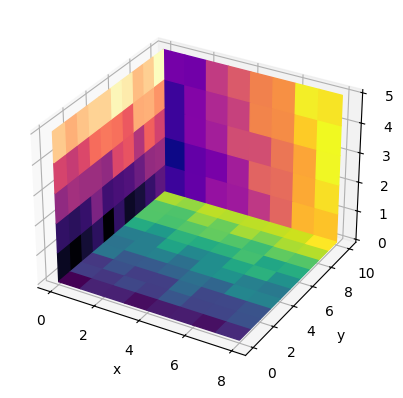

<Figure size 640x480 with 0 Axes>

In [1]:
# 3D Heatmap in Python using matplotlib 
  
# to make plot interactive  
# %matplotlib 
  
# importing required libraries 
# from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 
# from pylab import *

from matplotlib.colors import Normalize


def imshow3d(ax, array, value_direction='z', pos=0, norm=None, cmap=None):
    """
    Display a 2D array as a  color-coded 2D image embedded in 3d.

    The image will be in a plane perpendicular to the coordinate axis *value_direction*.

    Parameters
    ----------
    ax : Axes3D
        The 3D Axes to plot into.
    array : 2D numpy array
        The image values.
    value_direction : {'x', 'y', 'z'}
        The axis normal to the image plane.
    pos : float
        The numeric value on the *value_direction* axis at which the image plane is
        located.
    norm : `~matplotlib.colors.Normalize`, default: Normalize
        The normalization method used to scale scalar data. See `imshow()`.
    cmap : str or `~matplotlib.colors.Colormap`, default: :rc:`image.cmap`
        The Colormap instance or registered colormap name used to map scalar data
        to colors.
    """
    if norm is None:
        norm = Normalize()
    colors = plt.get_cmap(cmap)(norm(array))

    if value_direction == 'x':
        nz, ny = array.shape
        zi, yi = np.mgrid[0:nz + 1, 0:ny + 1]
        xi = np.full_like(yi, pos)
    elif value_direction == 'y':
        nx, nz = array.shape
        xi, zi = np.mgrid[0:nx + 1, 0:nz + 1]
        yi = np.full_like(zi, pos)
    elif value_direction == 'z':
        ny, nx = array.shape
        yi, xi = np.mgrid[0:ny + 1, 0:nx + 1]
        zi = np.full_like(xi, pos)
    else:
        raise ValueError(f"Invalid value_direction: {value_direction!r}")
    ax.plot_surface(xi, yi, zi, rstride=1, cstride=1, facecolors=colors, shade=False)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set(xlabel="x", ylabel="y", zlabel="z")

nx, ny, nz = 8, 10, 5
data_xy = np.arange(ny * nx).reshape(ny, nx) + 15 * np.random.random((ny, nx))
data_yz = np.arange(nz * ny).reshape(nz, ny) + 10 * np.random.random((nz, ny))
data_zx = np.arange(nx * nz).reshape(nx, nz) + 8 * np.random.random((nx, nz))

imshow3d(ax, data_xy)
imshow3d(ax, data_yz, value_direction='x', cmap='magma')
imshow3d(ax, data_zx, value_direction='y', pos=ny, cmap='plasma')

with plt.ion():
    fig2 = plt.figure()
# plt.show()

In [1]:
import sys
import pyqtgraph as pg
import pyqtgraph.opengl as gl
from PyQt6.QtWidgets import QApplication

app=QApplication(sys.argv)
view=gl.GLViewWidget()  
view.setGeometry(50, 50, 600, 500)
view.opts['distance'] = 40
view.setWindowTitle('pyqtgraph example')
view.show() 
gx = gl.GLGridItem()
gx.rotate(90, 0, 1, 0)
gx.translate(-10, 0, 0)
view.addItem(gx)
gy = gl.GLGridItem()
gy.rotate(90, 1, 0, 0)

gy.translate(0, -10, 0)
view.addItem(gy)
gz = gl.GLGridItem()
gz.translate(0, 0, -10)
view.addItem(gz)
app.exec()

0